In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
data= pd.read_csv('data/summed.csv')
print(len(data))
print(len(data.dropna()))
data=data.dropna()

189
183


Lets visualise out data to see where can be bigger correlation. On  the x axis will be house price index and on the y axis will be another column.

<IPython.core.display.Javascript object>


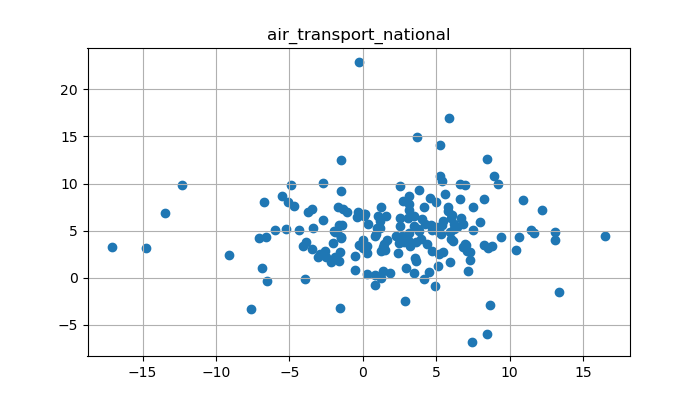

<IPython.core.display.Javascript object>


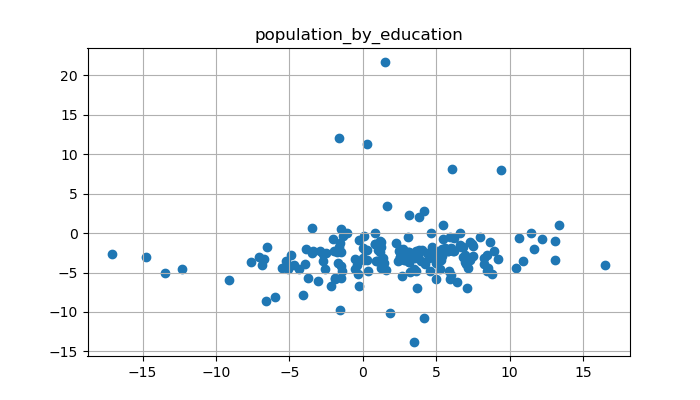

<IPython.core.display.Javascript object>


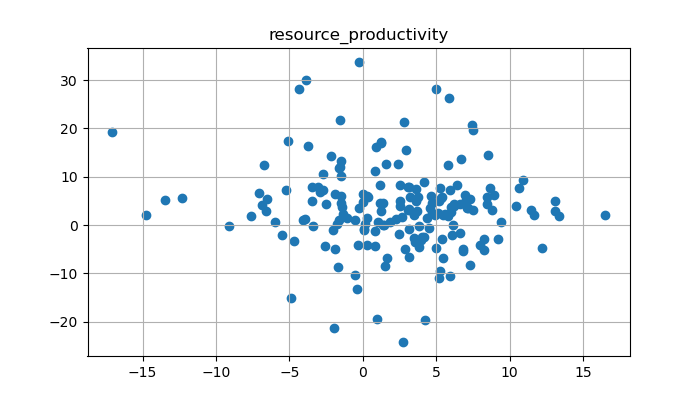

<IPython.core.display.Javascript object>


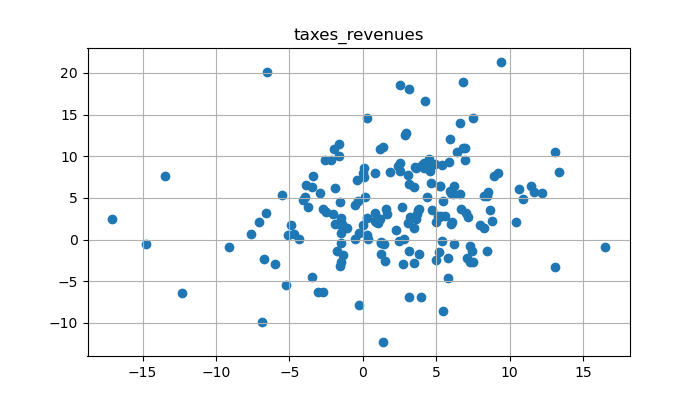

<IPython.core.display.Javascript object>


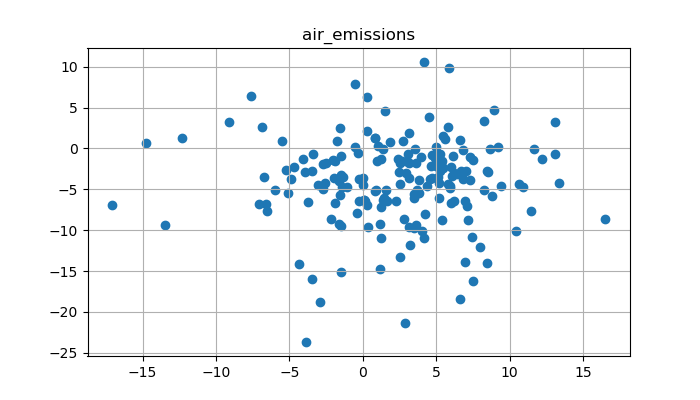

<IPython.core.display.Javascript object>


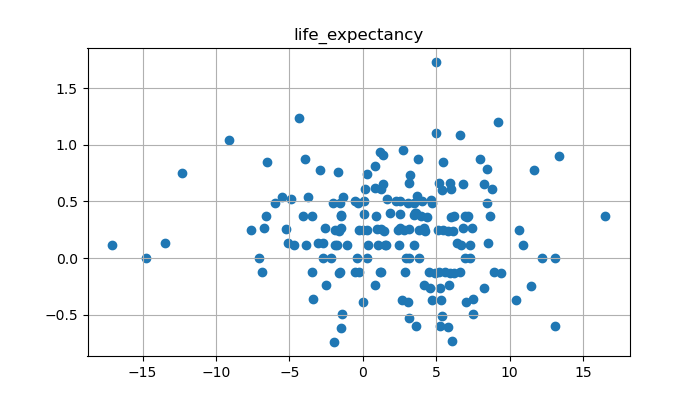

<IPython.core.display.Javascript object>


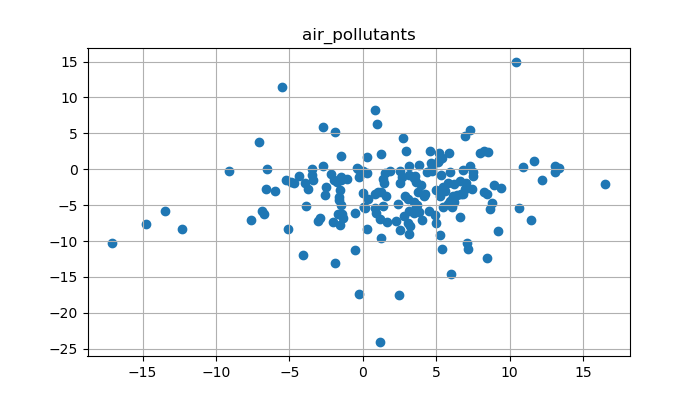

<IPython.core.display.Javascript object>


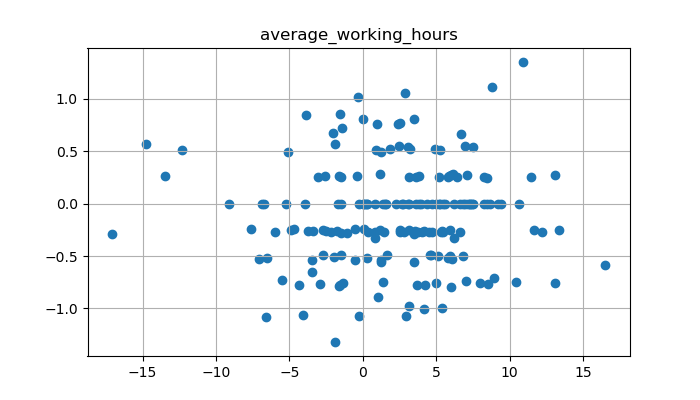

<IPython.core.display.Javascript object>


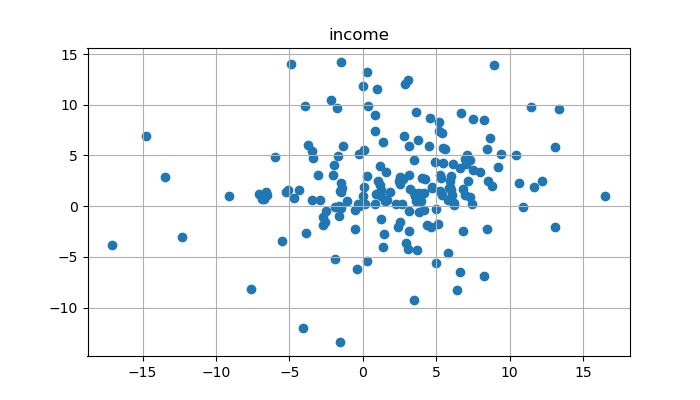

<IPython.core.display.Javascript object>


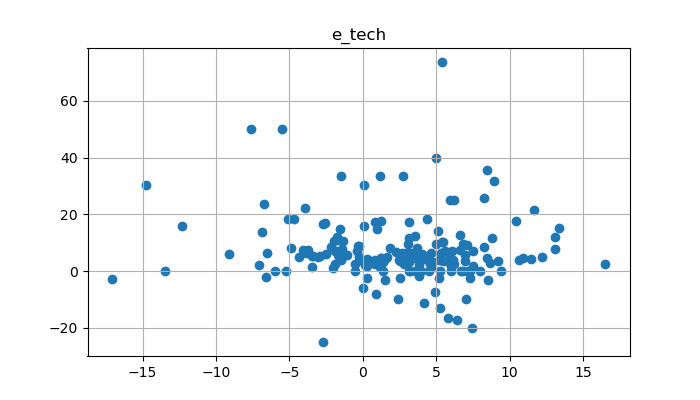

<IPython.core.display.Javascript object>


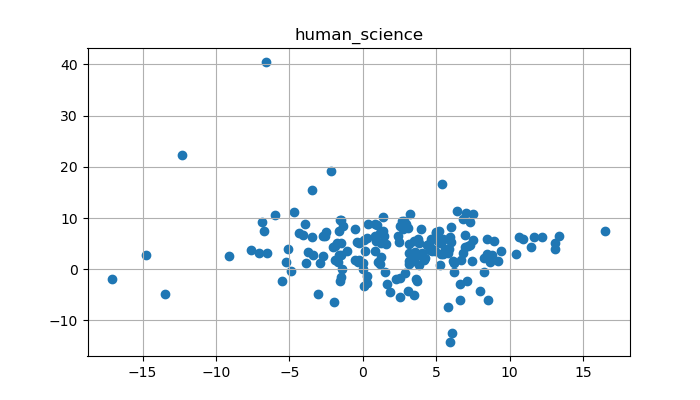

<IPython.core.display.Javascript object>


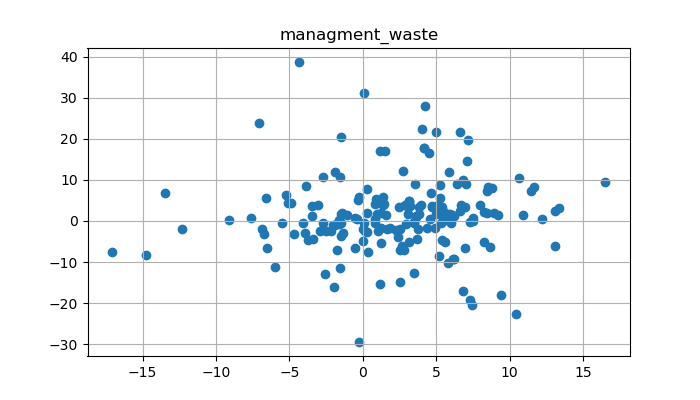

<IPython.core.display.Javascript object>


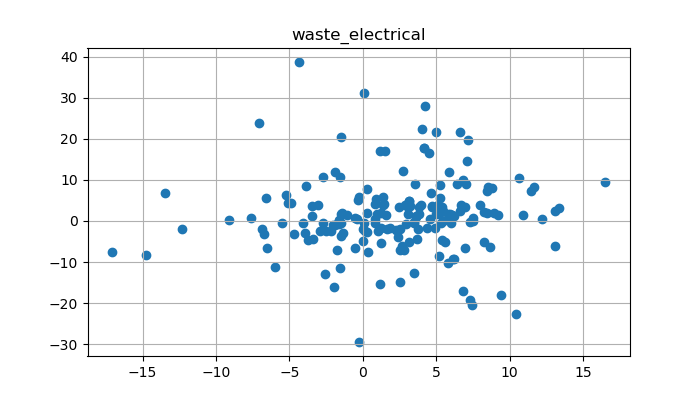

<IPython.core.display.Javascript object>


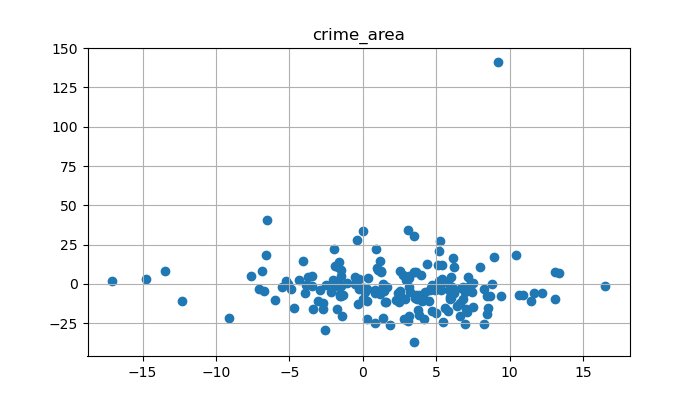

<IPython.core.display.Javascript object>


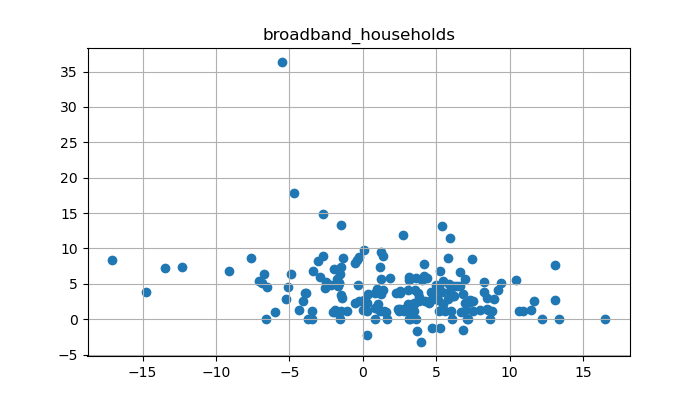

<IPython.core.display.Javascript object>


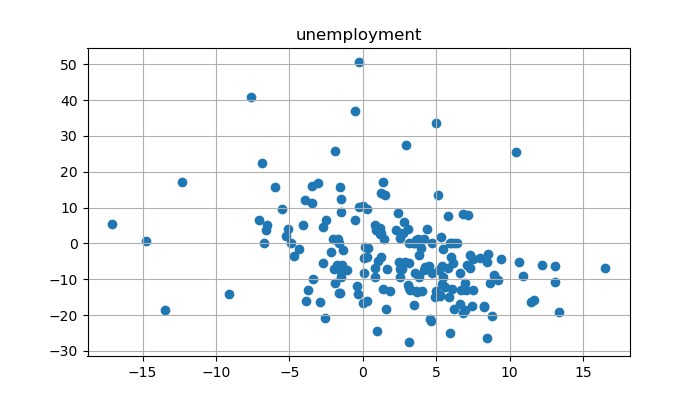

In [3]:
for column in data.columns:
    if column != 'house_price_index':
        plt.figure(figsize=(7,4))
        
        plt.scatter(data.house_price_index, data[column])
        
        plt.title(column)
        plt.grid()
        plt.show()

At the beginnig we have 16 features.

## Correlations method

We can see there that somewhere is points that are little bit strange. So lets find Pearson correlation coefficient of all ponits data and cleared data from there points correlations.

In [4]:
correlations=data.corr()
corr1=correlations['house_price_index'][1:]

In [5]:
data_cl=data.loc[data.air_transport_national !=data.air_transport_national.max()]
data_cl=data_cl.loc[data_cl.population_by_education !=data_cl.population_by_education.max()]
data_cl=data_cl.loc[data_cl.human_science !=data_cl.human_science.max()]
data_cl=data_cl.loc[data_cl.crime_area !=data_cl.crime_area.max()]
data_cl=data_cl.loc[data_cl.broadband_households !=data_cl.broadband_households.max()]


correlations=data_cl.corr()
corr2=correlations['house_price_index'][1:]

Let's make a table of correlation coefficients.

In [6]:
corr=pd.DataFrame({'All data correlations': corr1, 'Clear data correlations':corr2})
corr

,All data correlations,Clear data correlations
air_transport_national,0.024170,0.037569
population_by_education,0.128561,0.137084
resource_productivity,-0.099709,-0.098024
taxes_revenues,0.185037,0.181123
air_emissions,0.017242,0.015238
life_expectancy,-0.071585,-0.084675
air_pollutants,0.125339,0.164226
average_working_hours,0.029742,0.000044
income,0.121372,0.108885
e_tech,-0.100011,-0.081488


We can see that somewhere correlation was improved but somewhere the other way around. However we will se all data in model making, so lets take column if rounded average between two variables of all points data and clear data >= 0.1.

In [7]:
todrop=[]
for i in corr.index:
    mean=(corr.loc[i][0]+corr.loc[i][1])/2
    if np.abs(round(mean, 1)) <0.1:
        todrop.append(i)
print(todrop)


['air_transport_national', 'air_emissions', 'average_working_hours', 'managment_waste', 'waste_electrical']


In [8]:
df=data.drop(columns=todrop)
df

,house_price_index,population_by_education,resource_productivity,taxes_revenues,life_expectancy,air_pollutants,income,e_tech,human_science,crime_area,broadband_households,unemployment
0,4.01,-2.15,-2.51,8.89,0.50,-7.07,2.79,5.88,3.17,-10.86,5.48,-13.25
1,-5.51,-4.38,-2.09,5.33,0.54,11.46,-3.41,50.00,-2.33,-1.81,36.36,9.71
2,0.11,-3.47,-0.84,7.51,0.39,-5.31,5.57,30.43,-3.25,-2.60,9.84,-8.22
3,-1.70,-3.74,-8.63,1.93,0.76,-6.24,4.97,5.63,1.48,10.56,4.65,1.30
4,3.46,-13.81,-2.71,6.32,0.12,-1.22,1.31,4.65,-5.01,7.50,1.22,-17.14
...,...,...,...,...,...,...,...,...,...,...,...,...
184,8.27,-3.21,-2.86,5.21,-0.26,-3.15,8.45,8.57,2.16,-25.77,3.80,-17.65
185,5.90,-4.80,26.39,9.35,-0.24,2.33,1.82,6.38,3.87,-3.85,4.94,-14.89
186,1.56,-4.66,12.57,3.71,0.12,-3.72,3.40,4.71,4.99,-11.24,1.03,-18.33
187,6.64,-1.53,4.34,5.49,-0.12,-1.69,3.80,7.55,-6.06,-12.10,4.71,-8.33


So we have 11 features.

## Linear regression method

In [35]:
def MSE(y_target, y_pred):
    return (((y_target-y_pred)**2).sum())/len(y_target)

def RMSE(y_target, y_pred):
    return np.sqrt(MSE(y_target, y_pred))

We will analyse full data and clear data with 11 features separetly.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['house_price_index']), data.house_price_index, test_size=0.3, random_state=2)

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr=LinearRegression().fit(X_train, y_train)
rid=Ridge().fit(X_train, y_train)
las=Lasso().fit(X_train, y_train)

print('''Linear Regressions MSE: %.5g
Ridge regressions MSE: %.5g
Lasso regressions MSE: %.5g''' %(MSE(lr.predict(X_test), y_test),MSE(rid.predict(X_test), y_test),MSE(las.predict(X_test), y_test)))

Linear Regressions MSE: 31.612
Ridge regressions MSE: 31.553
Lasso regressions MSE: 29.167


Lasso gives the best result. Lets look at the weights of features and choose which one we will drop.

In [38]:
coef=pd.DataFrame({'coef lasso':las.coef_, 'coef rid':rid.coef_, 'coef linear':lr.coef_,'name':data.columns[1:]})
coef

,coef lasso,coef rid,coef linear,name
0,0.000000,0.053032,0.052585,air_transport_national
1,0.041820,0.098750,0.098896,population_by_education
2,-0.008494,-0.005528,-0.005020,resource_productivity
3,0.042384,0.064620,0.063679,taxes_revenues
4,0.020815,0.082567,0.082981,air_emissions
5,-0.000000,-0.110066,-0.113509,life_expectancy
6,-0.000000,-0.070628,-0.071395,air_pollutants
7,-0.000000,-1.337819,-1.392410,average_working_hours
8,0.114468,0.158359,0.158537,income
9,-0.008761,-0.019768,-0.020083,e_tech


So as table says we should drop 6 features. But lets look what will happen if we will choose best alpha for these models.

In [39]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [40]:
def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=3, random_state = 0, shuffle=False)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, test_indexes in kf.split(X):
            X_test, X_val = X.values[train_indexes], X.values[test_indexes]
            y_test, y_val = y.values[train_indexes], y.values[test_indexes]

            model.fit(X_test, y_test)
            mse = mean_squared_error(y_val,model.predict(X_val))
            results.append((alpha, mse))
   

    best_alpha, mse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, mse

In [41]:
ridge_alphas = np.linspace(0.1, 10, 100)
lasso_alphas = np.linspace(0.001, 5, 100)

print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), X_train, y_train, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), X_train, y_train, lasso_alphas))

C:\Users\Natal\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Natal\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Ridge best alpha 10.0000 - Avg MSE 24.5247 
Lasso best alpha 1.5663 - Avg MSE 21.8950 


In [42]:
rid2=Ridge(alpha=10).fit(X_train, y_train)
las2=Lasso(alpha=1.5663).fit(X_train, y_train)

print('''Ridge regressions(a=0.1) MSE: %.5g
Lasso regressions(a=0.001) MSE: %.5g''' %(MSE(rid2.predict(X_test), y_test),MSE(las2.predict(X_test), y_test)))

Ridge regressions(a=0.1) MSE: 31.213
Lasso regressions(a=0.001) MSE: 29.037


In [44]:
coef=pd.DataFrame({'coef lasso2':las2.coef_, 'coef ridge2':rid2.coef_, 'name':data.columns[1:]})
coef

,coef lasso,coef rid,name
0,0.000000,0.055656,air_transport_national
1,0.013097,0.097769,population_by_education
2,-0.006175,-0.008743,resource_productivity
3,0.023014,0.070529,taxes_revenues
4,0.000000,0.079898,air_emissions
5,-0.000000,-0.086374,life_expectancy
6,-0.000000,-0.065757,air_pollutants
7,-0.000000,-0.989058,average_working_hours
8,0.088562,0.157134,income
9,-0.008349,-0.017834,e_tech


So, the best alpha says that we should drop 7 features.

### Check results by clear data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['house_price_index']), df.house_price_index, test_size=0.3, random_state=2)

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr=LinearRegression().fit(X_train, y_train)
rid=Ridge().fit(X_train, y_train)
las=Lasso().fit(X_train, y_train)

print('''Linear Regressions MSE: %.5g
Ridge regressions MSE: %.5g
Lasso regressions MSE: %.5g''' %(MSE(lr.predict(X_test), y_test),MSE(rid.predict(X_test), y_test),MSE(las.predict(X_test), y_test)))

Linear Regressions MSE: 31.181
Ridge regressions MSE: 31.173
Lasso regressions MSE: 29.315


In [47]:
coef=pd.DataFrame({'coef lasso':las.coef_, 'coef ridge':rid.coef_, 'coef linear':lr.coef_,'name':df.columns[1:]})
coef

,coef lasso,coef rid,coef linear,name
0,0.042994,0.093346,0.093053,population_by_education
1,-0.012040,-0.025914,-0.025959,resource_productivity
2,0.042066,0.074493,0.074354,taxes_revenues
3,-0.000000,-0.466223,-0.489461,life_expectancy
4,-0.000000,-0.041841,-0.041812,air_pollutants
5,0.113237,0.155424,0.155410,income
6,-0.007957,-0.008334,-0.008196,e_tech
7,-0.096072,-0.110372,-0.110130,human_science
8,0.006713,0.009627,0.009699,crime_area
9,-0.253119,-0.298114,-0.298343,broadband_households


In [48]:
ridge_alphas = np.linspace(0.1, 10, 100)
lasso_alphas = np.linspace(0.001, 5, 100)

print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), X_train, y_train, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), X_train, y_train, lasso_alphas))

C:\Users\Natal\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Ridge best alpha 10.0000 - Avg MSE 21.4859 
Lasso best alpha 0.2535 - Avg MSE 21.3875 


C:\Users\Natal\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [51]:
rid2=Ridge(alpha=10).fit(X_train, y_train)
las2=Lasso(alpha=1.5663).fit(X_train, y_train)

print('''Ridge regressions(a=0.1) MSE: %.5g
Lasso regressions(a=0.001) MSE: %.5g''' %(MSE(rid2.predict(X_test), y_test),MSE(las2.predict(X_test), y_test)))

Ridge regressions(a=0.1) MSE: 31.128
Lasso regressions(a=0.001) MSE: 29.037


In [53]:
coef=pd.DataFrame({'coef lasso2':las2.coef_, 'coef ridge2':rid2.coef_, 'name':df.columns[1:]})
coef

,coef lasso2,coef ridge2,name
0,0.013097,0.095014,population_by_education
1,-0.006175,-0.025635,resource_productivity
2,0.023014,0.075241,taxes_revenues
3,-0.000000,-0.326944,life_expectancy
4,-0.000000,-0.042051,air_pollutants
5,0.088562,0.155379,income
6,-0.008349,-0.009229,e_tech
7,-0.082842,-0.111717,human_science
8,0.005205,0.009193,crime_area
9,-0.221379,-0.296275,broadband_households


As we can see there also lasso says that we should drop two more columns.

In [60]:
drop=['life_expectancy','air_pollutants']

useful=df.drop(columns=drop)
useful.head()
print(len(useful.columns)-1)

9


So we have 9 features.